# ✅ Craling에 필요한 라이브러리 호출

In [6]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from tqdm import tqdm
import re
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore')

#  ✅ URL Crawling 

각 인기 급상승 카테고리 (최신, 음악, 게임, 영화) 크롤링 진행 

< 🎈 크롤링 항목 >

- 영상별 URL
- 영상별 제목 (title)
- 영상별 썸네일 이미지

In [3]:
def get_urls():
    # 기본 세팅
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
    # 기본 URL 세팅
    url = "https://www.youtube.com/feed/trending"
    options = webdriver.ChromeOptions()
    options.add_argument('--disable-gpu')
    options.add_argument('lang=ko_KR, en_US')
    options.add_argument('user-agent=' + user_agent)
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    
    # 최신 인기 급상승 채널 영상 URL 크롤링
    def RECENT_urls():
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
        driver.get(url)
        driver.implicitly_wait(3)
        
        # 페이지 스크롤 다운 (모든 동영상 로딩)
        last_height = driver.execute_script("return document.documentElement.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(5)
            new_height = driver.execute_script("return document.documentElement.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            time.sleep(1.5)
            # 유튜브 프리미엄 팝업 제거
            try:
                driver.find_element_by_css_selector('#dismiss-button > a').click()

            except:
                pass
            
        # 모든 동영상 (쇼츠 제외) 링크 리스트
        video_links = []
        # 영상 제목 리스트
        title_list = []
        for video in driver.find_elements(By.XPATH, "//a[@id='video-title']"):
            if video.get_attribute is not None and 'shorts' not in video.get_attribute('href'):
                video_links.append(video.get_attribute("href"))
                title_list.append(video.text.strip())
        
        # 최근 인기 동영상 제외한 영상 상위 50개만 선택 (타 카테고리와 겹침)
        video_links = video_links[:50]
        title_list = title_list[:50]
    
        # 썸네일 이미지 리스트
        thumbnails = []
        for video_link in video_links:
            driver.get(video_link)
            thumbnail = driver.find_element(By.XPATH, "//meta[@property='og:image']")
            thumbnails.append(thumbnail.get_attribute('content'))
    
       # 최근 인기 동영상 제외한 영상 상위 50개만 선택 (타 카테고리와 겹침)
        thumnails = thumbnails[:50]
        return video_links, title_list, thumbnails
    
    
    # 최신 인기 급상승 채널 (음악) 영상 크롤링
    def MUSIC_urls():
        driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)
        driver.get(url)
        driver.implicitly_wait(3)
    
        # 음악 버튼 클릭하기
        music_button = driver.find_element(By.XPATH, '//*[@id="tabsContent"]/tp-yt-paper-tab[2]/div/div[1]')
        ActionChains(driver).click(music_button).perform()

        # 페이지 스크롤 다운 (모든 동영상 로딩)
        last_height = driver.execute_script("return document.documentElement.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(5)
            new_height = driver.execute_script("return document.documentElement.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            time.sleep(1.5)
            # 유튜브 프리미엄 팝업 제거
            try:
                driver.find_element_by_css_selector('#dismiss-button > a').click()

            except:
                pass
    
        # 모든 동영상 (쇼츠 제외) 링크, 제목 리스트
        video_links = []
        title_list = []
        for video in driver.find_elements(By.XPATH, "//a[@id='video-title']"):
            if video.get_attribute is not None and 'shorts' not in video.get_attribute('href'):
                video_links.append(video.get_attribute("href"))
                title_list.append(video.text.strip())

        # 썸네일 이미지 리스트
        thumbnails = []
        for video_link in video_links:
            driver.get(video_link)
            thumbnail = driver.find_element(By.XPATH, "//meta[@property='og:image']")
            thumbnails.append(thumbnail.get_attribute('content'))

        return video_links, title_list, thumbnails

    
    # 최신 인기 급상승 채널 (게임) 영상 크롤링
    def GAME_urls():
        driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)
        driver.get(url)
        driver.implicitly_wait(3)
    
        # 게임 버튼 클릭하기
        game_button = driver.find_element(By.XPATH, '//*[@id="tabsContent"]/tp-yt-paper-tab[3]/div/div[1]')
        ActionChains(driver).click(game_button).perform()

        # 페이지 스크롤 다운 (모든 동영상 로딩)
        last_height = driver.execute_script("return document.documentElement.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(5)
            new_height = driver.execute_script("return document.documentElement.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            time.sleep(1.5)
            # 유튜브 프리미엄 팝업 제거
            try:
                driver.find_element_by_css_selector('#dismiss-button > a').click()

            except:
                pass
    
        # 모든 동영상 (쇼츠 제외) 링크 리스트
        video_links = []
        # 영상 제목 리스트
        title_list = []
        for video in driver.find_elements(By.XPATH, "//a[@id='video-title']"):
            if video.get_attribute is not None and 'shorts' not in video.get_attribute('href'):
                video_links.append(video.get_attribute("href"))
                title_list.append(video.text.strip())
            
        # 썸네일 이미지 리스트
        thumbnails = []
        # 조회수 리스트
        views_list = []
        # 전체 댓글수 리스트
        comments_count = []
        for video_link in video_links:
            driver.get(video_link)
            # 썸네일
            thumbnail = driver.find_element(By.XPATH, "//meta[@property='og:image']")
            thumbnails.append(thumbnail.get_attribute('content'))
        
            # 조회수
            view_button = driver.find_element(By.XPATH,'//*[@id="snippet"]')
            ActionChains(driver).click(view_button).perform()
            views = driver.find_element(By.XPATH,'//*[@id="info"]/span[1]').text
            view = views.split()[1][:-1].replace(",","")
            views_list.append(int(view))
            
            # 전체 댓글수 보일때까지 스크롤하기
            while True:
                try:
                    comments = driver.find_element(By.XPATH, '//*[@id="count"]/yt-formatted-string/span[2]')
                    comments = comments.text.strip()
                    comments = int(comments)
                    comments_count.append(comments)
                    break
                except:
                    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
                    time.sleep(2)
        return video_links, title_list, thumbnails, views_list, comments_count


    # 최신 인기 급상승 채널 (영화) 영상 크롤링
    def MOVIE_urls():
        driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = options)
        driver.get(url)
        driver.implicitly_wait(3)
    
        # 영화 버튼 클릭하기
        movie_button = driver.find_element(By.XPATH, '//*[@id="tabsContent"]/tp-yt-paper-tab[4]/div/div[1]')
        ActionChains(driver).click(movie_button).perform()

        # 페이지 스크롤 다운 (모든 동영상 로딩)
        last_height = driver.execute_script("return document.documentElement.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
            time.sleep(5)
            new_height = driver.execute_script("return document.documentElement.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            time.sleep(1.5)
            # 유튜브 프리미엄 팝업 제거
            try:
                driver.find_element_by_css_selector('#dismiss-button > a').click()

            except:
                pass
    
        # 모든 동영상 (쇼츠 제외) 링크리스트
        video_links = []
        # 영상 제목리스트
        title_list = []
        for video in driver.find_elements(By.XPATH, "//a[@id='video-title']"):
            if video.get_attribute is not None and 'shorts' not in video.get_attribute('href'):
                video_links.append(video.get_attribute("href"))
                title_list.append(video.text.strip())
            
        # 썸네일 이미지 리스트
        thumbnails = []
        # 조회수 리스트
        views_list = []
        # 전체 댓글수 리스트
        comments_count = []
        for video_link in video_links:
            driver.get(video_link)
            # 썸네일
            thumbnail = driver.find_element(By.XPATH, "//meta[@property='og:image']")
            thumbnails.append(thumbnail.get_attribute('content'))
        
            # 조회수
            view_button = driver.find_element(By.XPATH,'//*[@id="snippet"]')
            ActionChains(driver).click(view_button).perform()
            views = driver.find_element(By.XPATH,'//*[@id="info"]/span[1]').text
            view = views.split()[1][:-1].replace(",","")
            views_list.append(int(view))
            
            # 전체 댓글수 보일때까지 스크롤하기
            while True:
                try:
                    comments = driver.find_element(By.XPATH, '//*[@id="count"]/yt-formatted-string/span[2]')
                    comments = comments.text.strip()
                    comments = int(comments)
                    comments_count.append(comments)
                    break
                except:
                    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
                    time.sleep(2)
                    
        return video_links, title_list, thumbnails, views_list, comments_count
    
    # 결과 확인
    recent_results = RECENT_urls()
    recent_urls, recent_thumbnail_urls = recent_results[0], recent_results[2]

    music_results = MUSIC_urls()
    music_urls, music_thumbnail_urls = music_results[0], music_results[2]
    
    game_results = GAME_urls()
    game_urls, game_titles, game_thumbnails_urls, game_views_list = game_results[0], game_results[1], game_results[2], game_results[3]
    game_comments_count = game_results[4]
    
    movie_results = MOVIE_urls()
    movie_urls, movie_titles, movie_thumbnails_urls, movie_views_list = movie_results[0], movie_results[1], movie_results[2], movie_results[3]
    movie_comments_count = movie_results[4]
    
    # URL 리스트 결과 정리
    # 게임, 영화 카테고리에 한해 영상별 조회수, 전체댓글수도 크롤링 결과 출력
    recent_music_urls = [recent_urls, recent_thumbnail_urls, music_urls, music_thumbnail_urls]
    game_movie_urls = [game_urls, game_thumbnail_urls, movie_urls, movie_thumbnails_urls]
    game_movie_etc = [game_titles, game_views_list, game_comments_count, movie_titles, movie_views_list, movie_comments_count]
    
    # 리턴 결과 출력
    return [recent_music_urls, game_movie_urls, game_movie_etc]

# Comment Crawling

## 🎈 Category : RECENT & MUSIC

In [ ]:
from Youtube_URL_Crawling import get_urls


## 🎈 Category : GAME & MOVIE

앞서 2에서 제작한 함수로 URL 가져오기

In [ ]:
url = get_urls()

In [ ]:
game_movie_url, etc = url[1], url[2]

In [ ]:
game_urls, movie_urls = game_movie_url[0], game_movie_url[2]
game_thumbnail_urls, movie_thumbnails_urls = game_movie_url[1], game_movie_url[3]
game_titles, game_views_list, game_comments_count = etc[0], etc[1], etc[2]
movie_titles, movie_views_list, movie_comments_count = etc[3]. etc[4]. etc[5]

In [ ]:
df_game = pd.DataFrame(columns = ['category', 'title', 'img_url', 'count_of_views', 'url', 'count_of_comments'])

df_game['category'] = '게임'
df_game['title'] = game_titles
df_game['img_url'] = game_thumbnail_urls
df_game['count_of_views'] = game_views_list
df_game['url'] = game_urls
df_game['count_of_comments'] = game_comments_count

In [ ]:
df_movie = pd.DataFrame(columns = ['category', 'title', 'img_url', 'count_of_views', 'url', 'count_of_comments'])

df_movie['category'] = '게임'
df_movie['title'] = movie_titles
df_movie['img_url'] = movie_thumbnails_urls
df_movie['count_of_views'] = movie_views_list
df_movie['url'] = movie_urls
df_movie['count_of_comments'] = movie_comments_count

In [5]:
# URL을 통해 html 소스를 얻는 과정
def get_htmlsource_from_url(url):
    driver.get(url_movie_list[i])
    driver.implicitly_wait(10)
    # 스크롤 할 때마다 HTML이 변경 되기에 이를 위해 html 저장
    html_sources = []
    
    # 스크롤 횟수 지정 (스크롤 한번에 댓글 15개 정도)
    for i in range(12):
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(3)
        html_source = driver.page_source
        html_sources.append(html_source)
        # 유튜브 프리미엄 팝업 제거
        try:
            driver.find_element_by_css_selector("#dismiss-button > a").click()
        except:
            pass
        time.sleep(2)
    return html_sources

# 앞서 얻은 html 소스 리스트를 통해 댓글 작성한 ID, COMMENT 추출해 DataFrame에 저장
# 드라이버 연결 하는 부분 X
def get_comment_from_html(html_sources):
    df = pd.DataFrame(columns = ['id', 'comment'])
    for html_source in html_sources:
        # html 코드 파싱
        soup = BeautifulSoup(html_source, 'html.parser')
        # id 리스트
        id_list = soup.select("div#header-author > h3 > #author-text > span")
        # comment 리스트  
        comment_list = soup.select('yt-formatted-string#content-text') 
    
        youtube_id = []
        youtube_comment = []
        # 각 comment 별 id, comment 출력
        for i in range(len(comment_list)):
            id_ = id_list[i].text
            id_ = id_.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').strip()
            # 댓글 작성자
            youtube_id.append(id_) 

            comment_ = comment_list[i].text
            comment_ = comment_.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').strip()
            # 댓글 내용 저장
            youtube_comment.append(comment_) 
        comment_final.append(youtube_comment)
    
        # DIC으로 값들 저장하며 DataFrame화
        youtube_data = {'id' : Youtube_id, 'comment' : youtube_comment}
        youtube_game_df = pd.DataFrame(youtube_game_data)
        # 만들어 둔 빈 df에 모든 html소스 concat하여 데이터 적재
        df = pd.concat([df, youtube_game_df], axis=0)
    return df

### GAME & MOVIE 댓글 출력

In [ ]:
for i in range(len(game_urls)):
    get_htmlsource_from_url(game_urls[i])
df_game_comment = get_comment_from_html(html_sources)

In [ ]:
for i in range(len(movie_urls)):
    get_htmlsource_from_url(movie_urls[i])
df_movie_comment = get_comment_from_html(html_sources)

마우스 스크롤 과정에서 html이 겹칠 수 있음 

-> 이를 이용해 id, comment에 한해 중복되는 요소 제거해주기

(겹치는 요소 제거를 위해 id도 추출함)

In [ ]:
df_game_comment.drop_duplicates(inplace = True)
df_movie_comment.drop_duplicates(inplace = True)

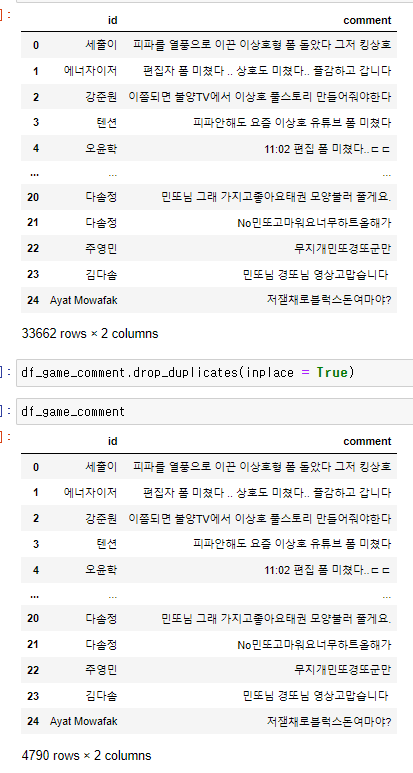

In [ ]:
# 인덱싱하여 영상 별 댓글 구분
df_game_comment.reset_index(drop=False, inplace=True)

### 댓글 별 키워드 뽑아내기

In [ ]:
# 댓글 별 빈도수로 키워드 추출
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# 횟수를 기반으로 딕셔너리 생성
from collections import Counter
# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [8]:
# 댓글 별 키워드 counter 화
def frequent(comment):
    frequency = []
    hannanum = Hannanum() 
    for i in range(len(comment)):
        nouns = hannanum.nouns(str(comment[i]))
        word = [noun for noun in nouns if (len(noun)>1 and "ㅋㅋ" not in noun and "ㅎㅎ" not in noun)]
        frequency += word
    counter = Counter(frequency)
    return counter

In [ ]:
# counting 한 키워드 별 상위 키워드 30개 추출
def top_thirty(fre):
    top30 = fre.most_common(30)
    keyword = []
    for k, v in top30:
        keyword.append(''.join(str(k)))
    result = ' '.join(keyword)
    return result

In [9]:
# 영상별 댓글을 통해 다음 필드 추출
# comments_all : 크롤링한 모든 댓글
# comments : 댓글 상위 30개
# scrap_count : 크롤링한 댓글수

def merge_comment(df1, df2):
    video_split_idx = df1[df1['index'] == 0].index
    for i in range(len(video_split_idx)-1):
        start_idx = video_split_idx[i]
        end_idx = video_split_idx[i+1]
        data = df1.iloc[start_idx:end_idx]
        comment = list(data['comment'])
        sample_comment = list(data['comment'])[:30]
        comment_length = len(data['comment'])
        frequency_comment = frequent(comment)
        keyword = top_thirty(frequency_comment)
        
    comments += [comment]
    sample_comments += [sample_comment]
    scrap_count += [comment_length]
    frequency += [frequency_comment]
    freq_keyword += [keyword]
    
    words = sum([globals()[f'frequency_comment{i}'] for i in range(1, len(df2))], Counter())
    
    def word_cloud(words):
        wordcloud = WordCloud(font_path = 'malgun', 
                      background_color = 'white',
                      height = 2000,
                      width = 2000,
                      contour_width = 100,
                      contour_color = 'black')

        img = wordcloud.generate_from_frequencies(game_word)
        plt.figure(figsize = (8, 6))
        plt.xticks(ticks=[], labels=[])
        plt.yticks(ticks=[], labels=[])
        plt.imshow(img, interpolation="bilinear")
        filenames = ['game.png', 'movie.png']
        for i, name in enumerate(filenames):
            plt.savefig(name)
            
    df2['comments_all'] = comments
    df2['comments'] = sample_comments
    df2['scrap_count'] = scrap_count
    df2['word_frequency'] = frequency
    df2['keyword'] = freq_keyword
    
    return df2

In [ ]:
merge_comment(df_game_comment, df_game)

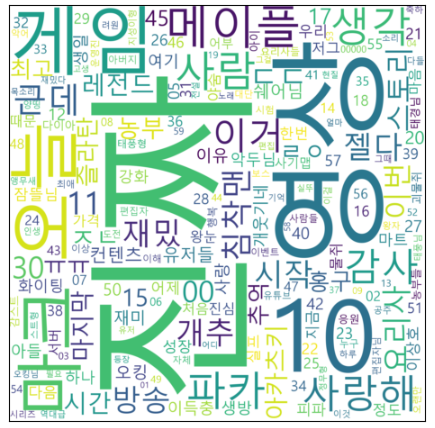

In [ ]:
merge_comment(df_movie_comment, df_movie)

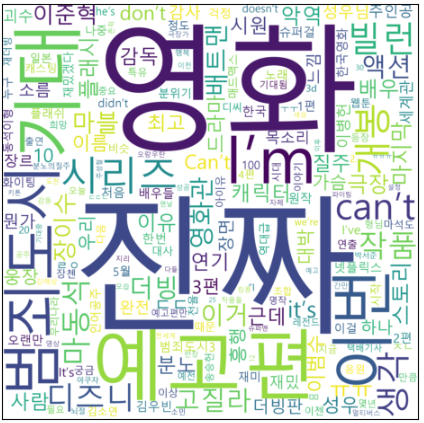

In [ ]:
game_movie = pd.concat([df_game, df_movie], axis = 0)
game_movie.reset_index(drop=False, inplace=True)
game_movie.drop(['index'], axis=1, inplace=True)
game_movie.info()

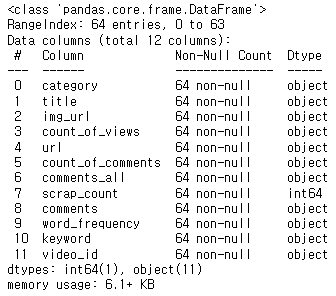

In [ ]:
game_movie.to_csv('youtube_game_movie_data.csv', index=False)

# To json

< GAME & MOVIE part >

- 현재 DataFrame -> json 형변환

< RECENT & MUSIC part >

- 현재 dictionary -> json 형변환

In [ ]:
game = game_movie[game_movie['category'] == '게임']
movie = game_movie[game_movie['category'] == '영화']

## comment TABLE

In [ ]:
game_comments_table = game[['video_id', 'comments']]
movie_comments_table = movie[['video_id', 'comments']]

gc_key = game_comments_table['video_id']
gc_value = game_comments_table['comments']

mc_key = movie_comments_table['video_id']
mc_value = movie_comments_table['comments']

dic_game_comment = {}
for i in range(len(gc_key)):
    dic_game_comment[gc_key[i]] = gc_value[i]
    
dic_movie_comment = {}
for i in range(len(mc_key)):
    dic_movie_comment[mc_key[i]] = mc_value[i]

In [ ]:
with open("game_comment.json", "w") as table:
    json.dump(dic_game_comment, table)

with open("movie_comment.json", "w") as table:
    json.dump(dic_movie_comment, table)

## keyword TABLE

In [ ]:
game_keyword_table = game[['video_id', 'keyword']]
movie_keyword_table = movie[['video_id', 'keyword']]

In [ ]:
gk_key = game_keyword_table['video_id']
gk_value = game_keyword_table['keyword']

mk_key = movie_keyword_table['video_id']
mk_value = movie_keyword_table['keyword']

dic_game_keyword = {}
for i in range(len(gk_key)):
    dic_game_keyword[gk_key[i]] = gk_value[i]
    
dic_movie_keyword = {}
for i in range(len(mk_key)):
    dic_movie_keyword[mk_key[i]] = mk_value[i]

In [ ]:
with open("game_keyword.json", "w") as table:
    json.dump(dic_game_keyword, table)

with open("movie_keyword.json", "w") as table:
    json.dump(dic_movie_keyword, table)

## video TABLE

In [ ]:
game_video_table = game[['video_id', 'img_url', 'title', 'url', 'count_of_views', 'count_of_comments']]
movie_video_table = movie[['video_id', 'img_url', 'title', 'url', 'count_of_views', 'count_of_comments']]

In [ ]:
gv_key = game_video_table['video_id']
gv_value = game_video_table[['img_url', 'title', 'url', 'count_of_views', 'count_of_comments']]

mv_key = movie_video_table['video_id']
mv_value = movie_video_table[['img_url', 'title', 'url', 'count_of_views', 'count_of_comments']]

game_value_compose = []
for i in range(len(gv_value)):
    game_value_compose.append([game_video_table.loc[i, 'img_url'], game_video_table.loc[i, 'title'], game_video_table.loc[i, 'url'], game_video_table.loc[i, 'count_of_views'], game_video_table.loc[i,'count_of_comments']])

movie_value_compose = []
for i in range(len(mv_value)):
    movie_value_compose.append([movie_video_table.loc[i, 'img_url'], movie_video_table.loc[i, 'title'], movie_video_table.loc[i, 'url'], movie_video_table.loc[i, 'count_of_views'], movie_video_table.loc[i,'count_of_comments']])

dic_game_video = {}
for i in range(len(gv_key)):
    dic_game_video[gv_key[i]] = game_value_compose[i]
    
dic_movie_video = {}
for i in range(len(mv_key)):
    dic_movie_video[mv_key[i]] = movie_value_compose[i]

In [ ]:
def convert(s):
    if isinstance(s, np.int64):
        return int(s)
with open("game_video.json", "w") as table:
    json.dump(dic_game_video, table, default=convert)
    
with open("movie_video.json", 'w') as table:
    json.dump(dic_movie_video, table, default=convert)